# Analysis
---

In [1]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.dates import DateFormatter
import matplotlib.ticker as mticker
#import seaborn as sns
import scipy.stats as stats

In [2]:
# import cleaned amazon sale report data for consumers
product_sales_df = pd.read_csv("../output/cleaned_Amazon Sale Report.csv")

# display df
product_sales_df

,Order ID,Date,Status,Status (Successful),Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,promotion-group
0,405-8078784-5731545,2022-04-30,Cancelled,False,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,No Promotion
1,171-9198151-1101146,2022-04-30,Delivered,True,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,Kurta,3XL,B09K3WFS32,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,Amazon PLCC Free-Financing Universal Merchant
2,403-9615377-8133951,2022-04-30,Cancelled,False,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,No Promotion
3,406-7807733-3785945,2022-04-30,Delivered,True,Merchant,Standard,JNE3405,JNE3405-KR-S,Kurta,S,B081WX4G4Q,1,399.00,HYDERABAD,TELANGANA,500032.0,Amazon PLCC Free-Financing Universal Merchant ...,Amazon PLCC Free-Financing Universal Merchant
4,407-5443024-5233168,2022-04-30,Cancelled,False,Amazon,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,0,NaN,HYDERABAD,TELANGANA,500008.0,IN Core Free Shipping 2015/04/08 23-48-5-108,IN Core Free Shipping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49806,402-0082204-6323568,2022-05-31,Cancelled,False,Amazon,Expedited,JNE3797,JNE3797-KR-A-XL,Western Dress,XL,B09TH3H2DP,1,771.00,JUNAGADH,GUJARAT,362001.0,NaN,No Promotion
49807,408-9803724-6565965,2022-05-31,Cancelled,False,Amazon,Expedited,MEN5024,MEN5024-KR-L,Kurta,L,B08YYSQJTC,1,665.00,MUMBAI,MAHARASHTRA,400056.0,NaN,No Promotion
49808,408-5154281-4593912,2022-05-31,Cancelled,False,Amazon,Expedited,J0119,J0119-TP-XXXL,Top,3XL,B08RYPRVPV,1,574.00,PRAYAGRAJ (ALLAHABAD),UTTAR PRADESH,211007.0,NaN,No Promotion
49809,404-5182288-1653947,2022-05-31,Cancelled,False,Amazon,Expedited,JNE3638,JNE3638-KR-XS,Kurta,XS,B09814Q3QH,0,NaN,KOLKATA,WEST BENGAL,700040.0,NaN,No Promotion


In [3]:
# define output path
output_path = '../Images/BM_visualizations/'

## Date Setup

#### Look into date column

In [4]:
# set pandas option to show all rows
pd.set_option('display.max_rows', None)

In [5]:
# list all dates with count values
product_sales_df['Date'].value_counts()

Date
2022-04-25    857
2022-04-24    844
2022-04-20    820
2022-04-19    803
2022-04-17    793
2022-04-16    793
2022-04-26    771
2022-04-27    767
2022-04-23    760
2022-05-15    755
2022-04-21    737
2022-05-03    712
2022-05-02    710
2022-04-18    709
2022-04-15    704
2022-04-22    702
2022-04-14    698
2022-04-11    695
2022-05-04    674
2022-04-10    669
2022-05-18    658
2022-05-14    650
2022-04-28    641
2022-04-13    640
2022-05-17    636
2022-04-12    632
2022-05-16    625
2022-05-08    624
2022-05-07    614
2022-05-10    585
2022-05-09    583
2022-05-19    583
2022-04-07    579
2022-05-11    577
2022-04-09    575
2022-04-08    575
2022-04-03    572
2022-05-20    569
2022-05-01    563
2022-05-13    559
2022-06-08    553
2022-06-07    551
2022-04-06    546
2022-06-12    544
2022-06-01    541
2022-04-05    537
2022-06-21    530
2022-06-09    529
2022-06-06    526
2022-04-30    524
2022-05-21    522
2022-05-22    519
2022-06-02    518
2022-05-12    518
2022-04-02    514
2022-

In [6]:
# set pandas option to not show all rows
pd.reset_option('display.max_rows')

In [7]:
# find max and min dates
print(f"Min Date: {product_sales_df['Date'].min()}")
print(f"Max Date: {product_sales_df['Date'].max()}")

Min Date: 2022-04-01
Max Date: 2022-06-29


In [8]:
# convert date column to datetime datatype
product_sales_df = product_sales_df.copy()
product_sales_df['Date'] = pd.to_datetime(product_sales_df['Date'])

#### Aggregate data by date

In [9]:
# groupby date to get daily totals
daily_counts = product_sales_df.groupby('Date').size()

# groupby date for daily revenue
daily_revenue = product_sales_df.groupby('Date')['Amount'].sum()

In [10]:
# get weekly totals and revenue
weekly_counts = daily_counts.resample('W').sum()
weekly_revenue = daily_revenue.resample('W').sum()

In [11]:
# get monthly totals and revenue
monthly_counts = daily_counts.resample('ME').sum()
monthly_revenue = daily_revenue.resample('ME').sum()

#### Aggregate data by day of the week

In [12]:
# add day of the week column
product_sales_df['Day'] = product_sales_df['Date'].dt.day_name()

In [13]:
# get week day counts and revenue
day_counts = product_sales_df['Day'].value_counts()

day_revenue = product_sales_df.groupby('Day')['Amount'].sum()

#### Add a month column

In [14]:
# extract the month from the date column
product_sales_df['Month'] = product_sales_df['Date'].dt.to_period('M')

## Trend Analysis Over Time
---

#### Daily Trend

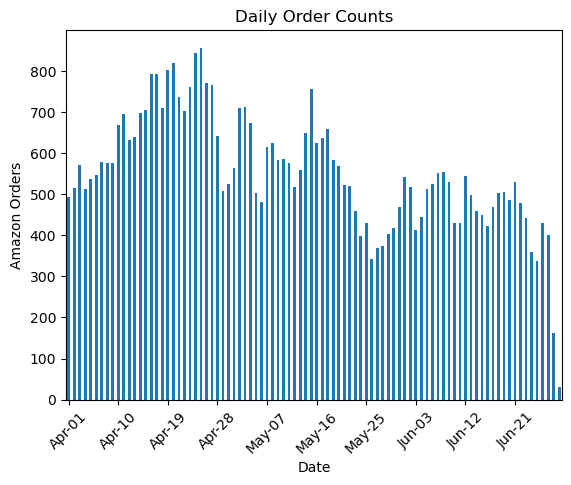

In [15]:
# plot daily order counts
daily_count_plt = daily_counts.plot(kind='bar', title='Daily Order Counts', 
                                     ylabel='Amazon Orders', rot=45)

# format xticks
daily_count_plt.set_xticklabels(daily_counts.index.strftime('%b-%d'))
plt.locator_params(axis='x', nbins=10)

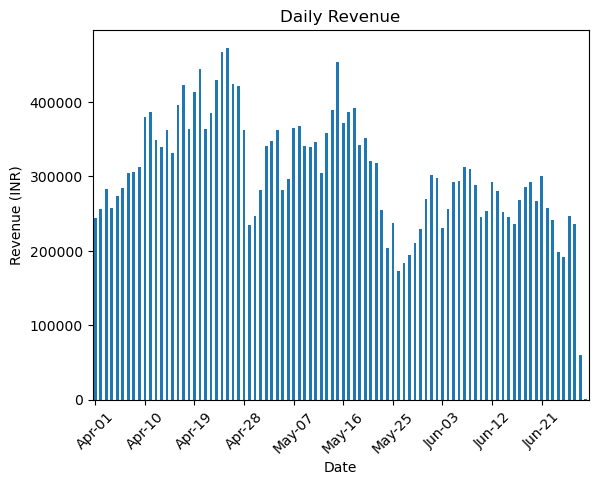

In [16]:
# plot daily order counts
daily_rev_plt = daily_revenue.plot(kind='bar', title='Daily Revenue', 
                                     ylabel='Revenue (INR)', rot=45)

# format xticks
daily_rev_plt.set_xticklabels(daily_revenue.index.strftime('%b-%d'))
plt.locator_params(axis='x', nbins=10)

#### Weekly Trend

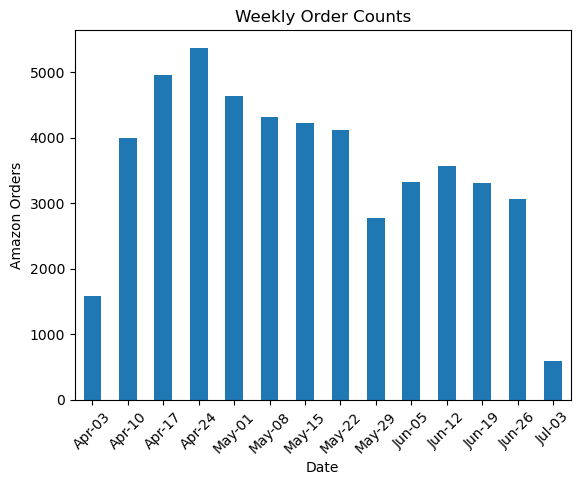

In [17]:
# plot weekly order counts
week_cnt_plt = weekly_counts.plot(kind='bar', title='Weekly Order Counts',
                                  ylabel='Amazon Orders', rot=45)

# format xticks
week_cnt_plt.set_xticklabels(weekly_counts.index.strftime('%b-%d'))

# show plot
plt.show()

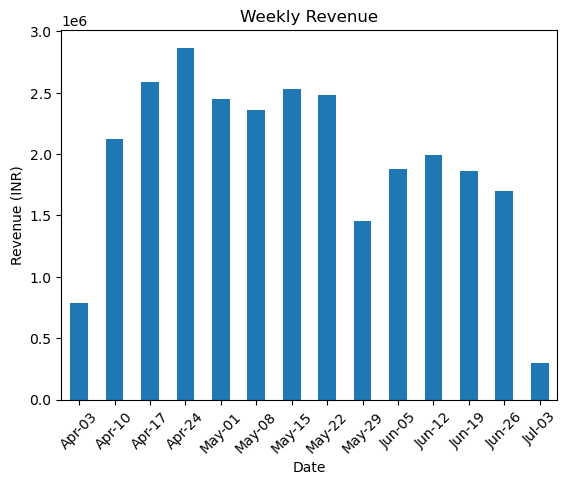

In [18]:
# plot weekly revenue
week_rev_plt = weekly_revenue.plot(kind='bar', title='Weekly Revenue',
                                  ylabel='Revenue (INR)', rot=45)

# format xticks
week_rev_plt.set_xticklabels(weekly_revenue.index.strftime('%b-%d'))

# show plot
plt.show()

#### Monthly Trend

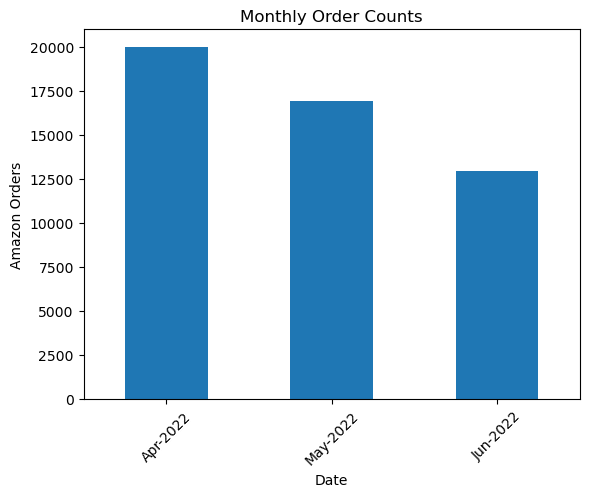

In [19]:
# plot monthly order counts
month_cnt_plt = monthly_counts.plot(kind='bar', title='Monthly Order Counts',
                                    ylabel='Amazon Orders', rot=45)

# format xticks
month_cnt_plt.set_xticklabels(monthly_counts.index.strftime('%b-%Y'))

# show plot
plt.show()

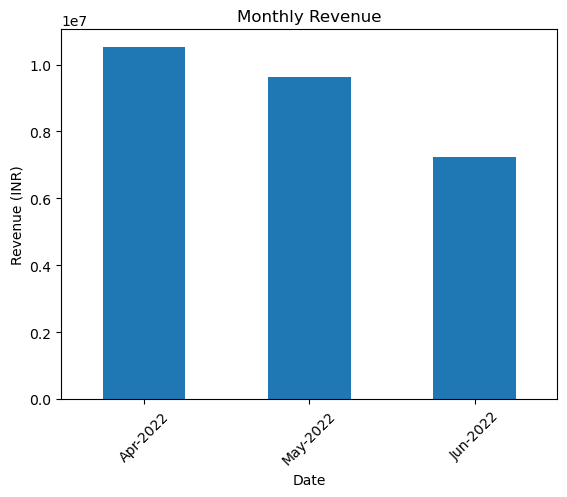

In [20]:
# plot monthly revenue
month_rev_plt = monthly_revenue.plot(kind='bar', title='Monthly Revenue',
                                    ylabel='Revenue (INR)', rot=45)

# format xticks
month_rev_plt.set_xticklabels(monthly_revenue.index.strftime('%b-%Y'))

# show plot
plt.show()

## ANOVA (one-way)
---

## Determine if there is a statistical significant difference in average total orders over time.

#### Monthly

In [21]:
# group by date to calculate daily order counts
daily_order_counts = product_sales_df.groupby(product_sales_df['Date'].dt.date)['Order ID'].count()

In [22]:
# add a 'Month' column to daily order counts to identify the month for each day
daily_order_counts = daily_order_counts.reset_index()
daily_order_counts['Month'] = pd.to_datetime(daily_order_counts['Date']).dt.to_period('M')
daily_order_counts

,Date,Order ID,Month
0,2022-04-01,494,2022-04
1,2022-04-02,514,2022-04
2,2022-04-03,572,2022-04
3,2022-04-04,513,2022-04
4,2022-04-05,537,2022-04
...,...,...,...
85,2022-06-25,337,2022-06
86,2022-06-26,430,2022-06
87,2022-06-27,400,2022-06
88,2022-06-28,162,2022-06


In [23]:
# group daily counts by month
monthly_grouped_data = daily_order_counts.groupby('Month')['Order ID'].apply(list)

# display data
monthly_grouped_data

Month
2022-04    [494, 514, 572, 513, 537, 546, 579, 575, 575, ...
2022-05    [563, 710, 712, 674, 502, 482, 614, 624, 583, ...
2022-06    [541, 518, 414, 445, 512, 526, 551, 553, 529, ...
Freq: M, Name: Order ID, dtype: object

In [24]:
# perform one-way ANOVA
monthly_anova = stats.f_oneway(*monthly_grouped_data)
print(f"ANOVA Test for Monthly Orders:")
print(f"F-statistic: {monthly_anova.statistic}, P-value: {monthly_anova.pvalue}")

ANOVA Test for Monthly Orders:
F-statistic: 28.16804415214544, P-value: 3.695056986763792e-10


### Monthly Analysis:
- P-value < 0.05: low p-value indicates that there is a statistically significant difference between average total orders across months in the second quarter.
- F-Statistic: variability between the monthly average daily orders is 28 times greater than the variability within each month--> aka average number of orders is significantly different across months.

- Overall: average daily orders differ significantly between the three months.

#### Day of the Week

In [25]:
# group by 'Day' and calculate daily order counts
weekday_grouped_data = product_sales_df.groupby(['Day', 'Date'])['Order ID'].count().reset_index()

# display df
weekday_grouped_data

,Day,Date,Order ID
0,Friday,2022-04-01,494
1,Friday,2022-04-08,575
2,Friday,2022-04-15,704
3,Friday,2022-04-22,702
4,Friday,2022-04-29,507
...,...,...,...
85,Wednesday,2022-06-01,541
86,Wednesday,2022-06-08,553
87,Wednesday,2022-06-15,449
88,Wednesday,2022-06-22,479


In [26]:
# create a list of daily order counts for each weekday
daily_counts_by_weekday = weekday_grouped_data.groupby('Day')['Order ID'].apply(list)

# display grouped data
daily_counts_by_weekday

Day
Friday       [494, 575, 704, 702, 507, 482, 559, 569, 369, ...
Monday       [513, 695, 709, 857, 710, 583, 625, 460, 417, ...
Saturday     [514, 575, 793, 760, 524, 614, 650, 522, 374, ...
Sunday       [572, 669, 793, 844, 563, 624, 755, 519, 404, ...
Thursday     [579, 698, 737, 641, 502, 518, 583, 342, 518, ...
Tuesday      [537, 632, 803, 771, 712, 585, 636, 399, 470, ...
Wednesday    [546, 640, 820, 767, 674, 577, 658, 430, 541, ...
Name: Order ID, dtype: object

In [27]:
# perform one-way ANOVA on daily order counts for each weekday
weekday_anova = stats.f_oneway(*daily_counts_by_weekday)
print(f"ANOVA Test for Weekday Orders:")
print(f"F-statistic: {weekday_anova.statistic}, P-value: {weekday_anova.pvalue}")

ANOVA Test for Weekday Orders:
F-statistic: 0.44420972327319286, P-value: 0.8471085759931702


### Weekday Analysis:
- High p-value (0.84 > 0.05) and low f-stat (0.44) indicate that there is no significant difference between average orders across different weekdays and weekday means don't differ significantly.
- Accept null hypothesis that the average number of daily orders is the same across all weekdays.

## Trend Analysis Over Time: Include Status
---

#### Aggregate Data: Day, Week, Month

In [28]:
# add date col as index
product_sales_df.set_index('Date', inplace=True)

In [29]:
# define function to aggregate data
def aggregate_sales(df, freq):
    aggregated = df.groupby([pd.Grouper(freq=freq), 'Status']).agg(
        Orders=('Order ID', 'count'),
        Revenue=('Amount', 'sum')
    ).reset_index()
    return aggregated

In [30]:
# aggregate for daily, weekly, and monthly frequencies
daily_agg = aggregate_sales(product_sales_df, 'D')
weekly_agg = aggregate_sales(product_sales_df, 'W')
monthly_agg = aggregate_sales(product_sales_df, 'ME')

#### Aggregate Data: Day of the Week

In [31]:
# aggregate data for week day
weekday_agg = product_sales_df.groupby(['Day', 'Status']).agg(
    Orders=('Order ID', 'count'),
    Revenue=('Amount', 'sum')
).reset_index()

In [32]:
# sort weekday order from Mon-Sun
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_agg['Day'] = pd.Categorical(weekday_agg['Day'], categories=weekday_order, ordered=True)
weekday_agg = weekday_agg.sort_values('Day')

#### Visualizations: Revenue

In [33]:
# define function to plot revenue
def plot_revenue_aggregated(data, time_frame):
    
    # pivot data for visualzation
    pivot_data = data.pivot(index='Date', columns='Status', values='Revenue').fillna(0)

    # reorder Status values for desired stacking order
    stack_order = ['Delivered', 'Cancelled', 'RTS (Return to Seller)']
    pivot_data = pivot_data[stack_order]

    # create the plot
    rev_plt = pivot_data.plot(kind='bar', stacked=True, color={
        'Delivered': 'green',
        'Cancelled': 'red',
        'RTS (Return to Seller)': 'orange'
    })

    # format yaxis to display full numbers with commas
    rev_plt.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

    # format xticks based on time frame
    if time_frame == 'Daily':
        rev_plt.set_xticklabels(pivot_data.index.strftime('%b-%d'))
        plt.locator_params(axis='x', nbins=10)
    elif time_frame == 'Weekly':
        rev_plt.set_xticklabels(pivot_data.index.strftime('%b-%d'))
    elif time_frame == 'Monthly':
        rev_plt.set_xticklabels(pivot_data.index.strftime('%b-%Y'))
    

    # customize formatting
    plt.title(f'Total Revenue by Status Over Time ({time_frame})')
    plt.xlabel('Date')
    plt.ylabel('Revenue (INR)')
    plt.xticks(rotation=45)
    plt.legend(title='Status')
    plt.tight_layout()
    
    # show plot
    plt.show()

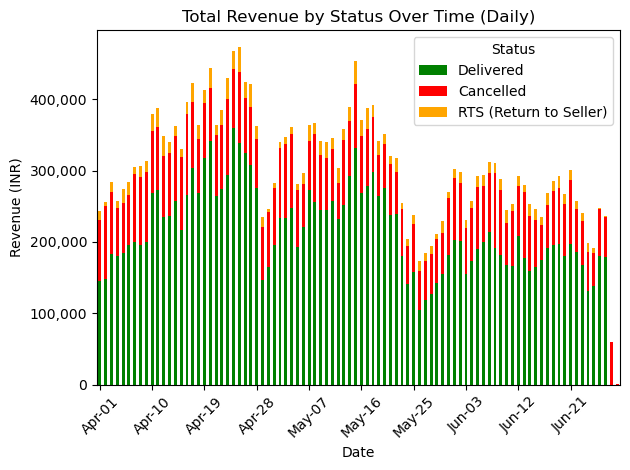

In [34]:
# plot daily revenue by status
plot_revenue_aggregated(daily_agg, 'Daily')

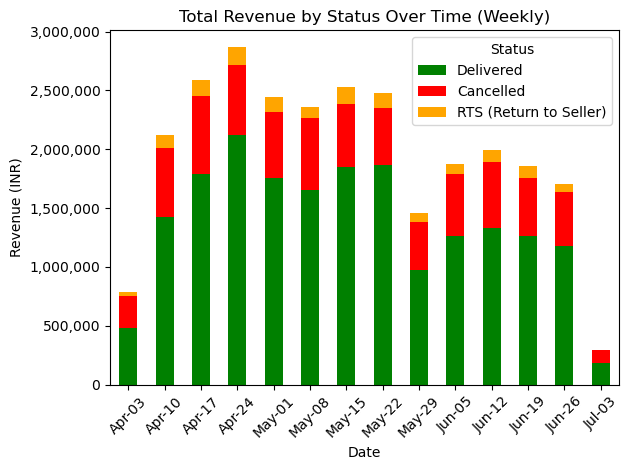

In [35]:
# plot weekly revenue by status
plot_revenue_aggregated(weekly_agg, 'Weekly')

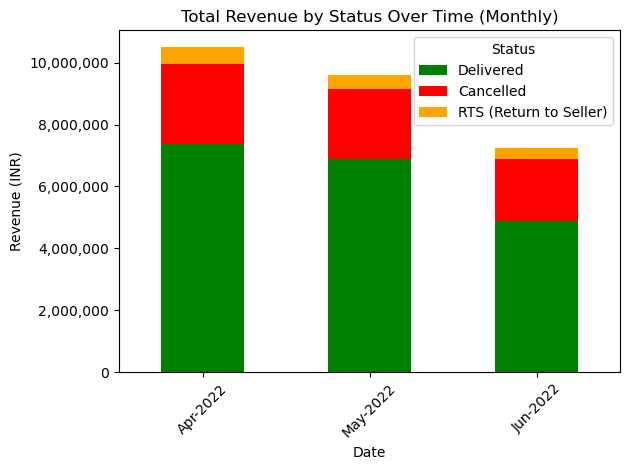

In [36]:
# plot monthly revenue by status
plot_revenue_aggregated(monthly_agg, 'Monthly')

#### Visualizations: Order Count

In [37]:
# define function to plot order count
def plot_count_aggregated(data, time_frame):
    
    # pivot data for visualzation
    pivot_data = data.pivot(index='Date', columns='Status', values='Orders').fillna(0)

    # reorder Status values for desired stacking order
    stack_order = ['Delivered', 'Cancelled', 'RTS (Return to Seller)']
    pivot_data = pivot_data[stack_order]

    # create the plot
    cnt_plt = pivot_data.plot(kind='bar', stacked=True, color={
        'Delivered': 'green',
        'Cancelled': 'red',
        'RTS (Return to Seller)': 'orange'
    })

    # format yaxis to display full numbers with commas
    cnt_plt.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

    # format xticks based on time frame
    if time_frame == 'Daily':
        cnt_plt.set_xticklabels(pivot_data.index.strftime('%b-%d'))
        plt.locator_params(axis='x', nbins=10)
    elif time_frame == 'Weekly':
        cnt_plt.set_xticklabels(pivot_data.index.strftime('%b-%d'))
    elif time_frame == 'Monthly':
        cnt_plt.set_xticklabels(pivot_data.index.strftime('%b-%Y'))
    

    # customize formatting
    plt.title(f'Total Orders by Status Over Time ({time_frame})')
    plt.xlabel('Date')
    plt.ylabel('Orders')
    plt.xticks(rotation=45)
    plt.legend(title='Status')
    plt.tight_layout()

    # save plot if month
    if time_frame == 'Monthly':
        plt.savefig(f"{output_path}total_orders_by_status_month.png")
    
    # show plot
    plt.show()

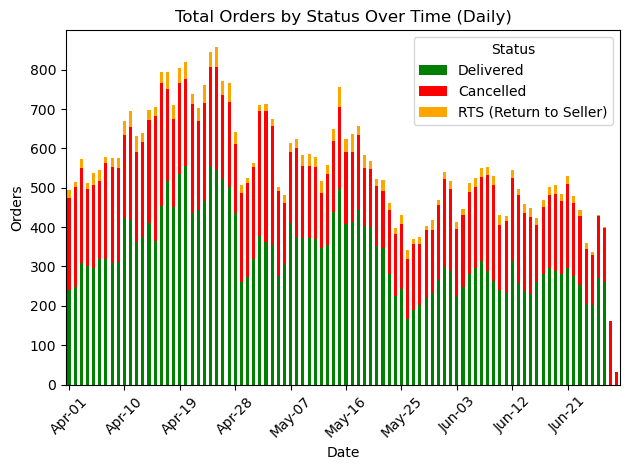

In [38]:
# plot daily order counts
plot_count_aggregated(daily_agg, 'Daily')

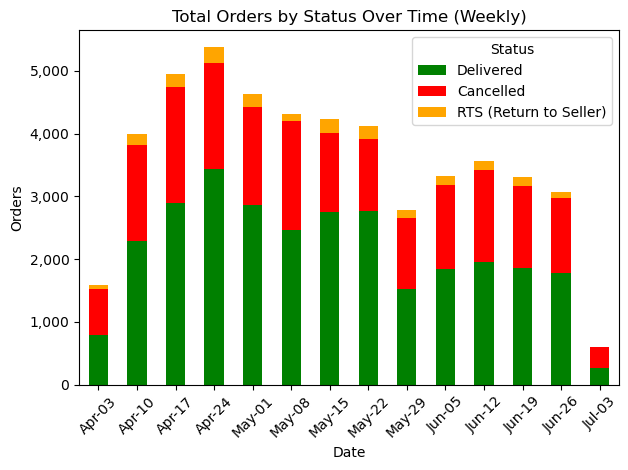

In [39]:
# plot weekly order counts
plot_count_aggregated(weekly_agg, 'Weekly')

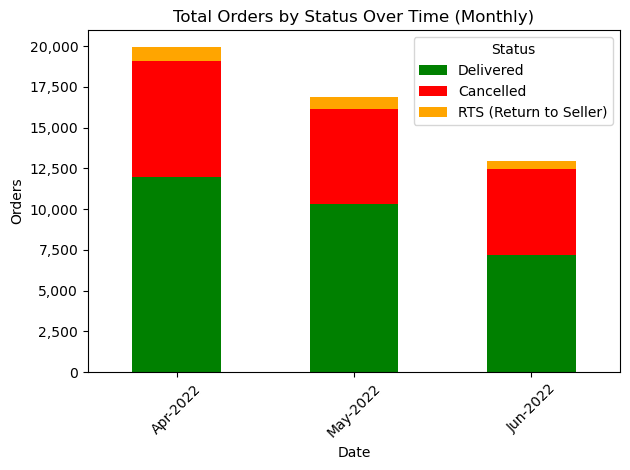

In [40]:
# plot monthly order counts
plot_count_aggregated(monthly_agg, 'Monthly')

#### Visualizations: Weekday

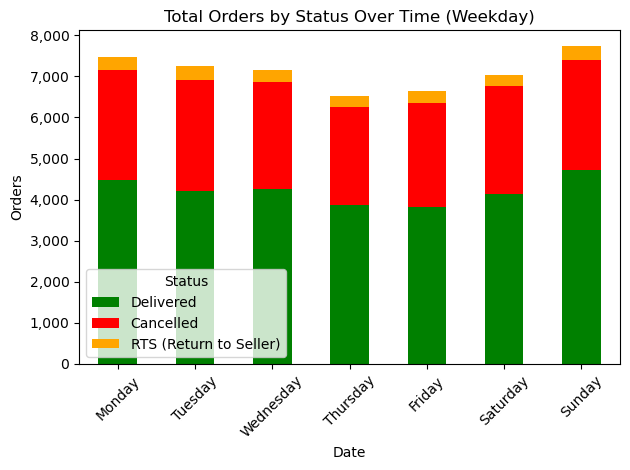

In [41]:
# pivot data for total orders visualzation
pivot_data = weekday_agg.pivot(index='Day', columns='Status', values='Orders').fillna(0)

# reorder Status values for desired stacking order
stack_order = ['Delivered', 'Cancelled', 'RTS (Return to Seller)']
pivot_data = pivot_data[stack_order]

# create the plot
cnt_plt = pivot_data.plot(kind='bar', stacked=True, color={
    'Delivered': 'green',
    'Cancelled': 'red',
    'RTS (Return to Seller)': 'orange'})

# format yaxis to display full numbers with commas
cnt_plt.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# customize formatting
plt.title(f'Total Orders by Status Over Time (Weekday)')
plt.xlabel('Date')
plt.ylabel('Orders')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()

# save plot
plt.savefig(f"{output_path}total_orders_by_status_weekday.png")

# show plot
plt.show()

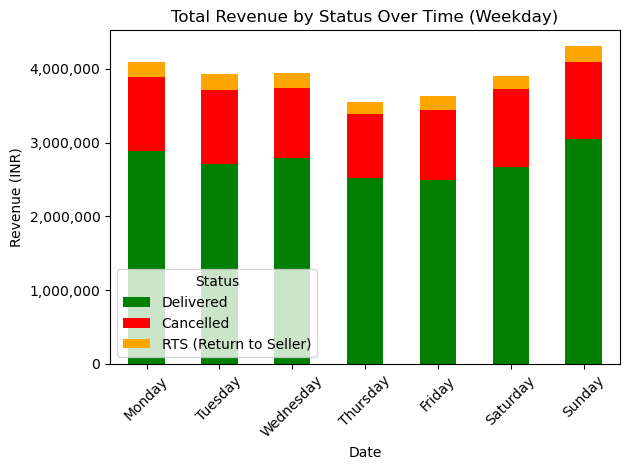

In [42]:
# pivot data for total orders visualzation
pivot_data = weekday_agg.pivot(index='Day', columns='Status', values='Revenue').fillna(0)

# reorder Status values for desired stacking order
stack_order = ['Delivered', 'Cancelled', 'RTS (Return to Seller)']
pivot_data = pivot_data[stack_order]

# create the plot
rev_plt = pivot_data.plot(kind='bar', stacked=True, color={
    'Delivered': 'green',
    'Cancelled': 'red',
    'RTS (Return to Seller)': 'orange'})

# format yaxis to display full numbers with commas
rev_plt.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# customize formatting
plt.title(f'Total Revenue by Status Over Time (Weekday)')
plt.xlabel('Date')
plt.ylabel('Revenue (INR)')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()

# show plot
plt.show()

### Stats: Status

In [43]:
# look at overall status count rates by month
monthly_status_stats = product_sales_df.groupby(['Month', 'Status'])['Order ID'].count().unstack()

# add status rate columns
monthly_status_stats['Total Orders'] = monthly_status_stats.sum(axis=1)
monthly_status_stats['Success Rate (%)'] = monthly_status_stats['Delivered'] / monthly_status_stats['Total Orders'] * 100
monthly_status_stats['Cancelled Rate (%)'] = monthly_status_stats['Cancelled'] / monthly_status_stats['Total Orders'] * 100
monthly_status_stats['Returned Rate (%)'] = monthly_status_stats['RTS (Return to Seller)'] / monthly_status_stats['Total Orders'] * 100

# display stats
monthly_status_stats

Status,Cancelled,Delivered,RTS (Return to Seller),Total Orders,Success Rate (%),Cancelled Rate (%),Returned Rate (%)
Month,,,,,,,
2022-04,7112,11961,898,19971,59.891843,35.611637,4.496520
2022-05,5843,10327,715,16885,61.160794,34.604679,4.234528
2022-06,5285,7184,486,12955,55.453493,40.795060,3.751447


In [ ]:
# display success rates by month
monthly_status_stats[['Total Orders', 'Success Rate (%)', 'Cancelled Rate (%)', 'Returned Rate (%)']]

Status,Total Orders,Success Rate (%),Cancelled Rate (%),Returned Rate (%)
Month,,,,
2022-04,19971,59.891843,35.611637,4.496520
2022-05,16885,61.160794,34.604679,4.234528
2022-06,12955,55.453493,40.795060,3.751447


In [44]:
# look at overall status count rates by weekday
weekday_status_stats = product_sales_df.groupby(['Day', 'Status'])['Order ID'].count().unstack()

# add status rate columns
weekday_status_stats['Total Orders'] = weekday_status_stats.sum(axis=1)
weekday_status_stats['Success Rate (%)'] = weekday_status_stats['Delivered'] / weekday_status_stats['Total Orders'] * 100
weekday_status_stats['Cancelled Rate (%)'] = weekday_status_stats['Cancelled'] / weekday_status_stats['Total Orders'] * 100
weekday_status_stats['Returned Rate (%)'] = weekday_status_stats['RTS (Return to Seller)'] / weekday_status_stats['Total Orders'] * 100

# display stats
weekday_status_stats

Status,Cancelled,Delivered,RTS (Return to Seller),Total Orders,Success Rate (%),Cancelled Rate (%),Returned Rate (%)
Day,,,,,,,
Friday,2542,3818,274,6634,57.552005,38.317757,4.130238
Monday,2676,4483,318,7477,59.957202,35.789755,4.253043
Saturday,2636,4139,265,7040,58.792614,37.443182,3.764205
Sunday,2692,4716,327,7735,60.969619,34.802844,4.227537
Thursday,2386,3858,269,6513,59.235375,36.634423,4.130201
Tuesday,2709,4202,336,7247,57.982613,37.380985,4.636401
Wednesday,2599,4256,310,7165,59.399860,36.273552,4.326588


In [73]:
# display success rates by weekday
weekday_status_stats[['Total Orders', 'Success Rate (%)', 'Cancelled Rate (%)', 'Returned Rate (%)']]

Status,Total Orders,Success Rate (%),Cancelled Rate (%),Returned Rate (%)
Day,,,,
Friday,6634,57.552005,38.317757,4.130238
Monday,7477,59.957202,35.789755,4.253043
Saturday,7040,58.792614,37.443182,3.764205
Sunday,7735,60.969619,34.802844,4.227537
Thursday,6513,59.235375,36.634423,4.130201
Tuesday,7247,57.982613,37.380985,4.636401
Wednesday,7165,59.399860,36.273552,4.326588


## Chi-Squared Test of Independence
---

## Determine if there is a relationship between order status and time--> does order status vary across different time periods?

In [45]:
# define function to perform chi-square test
def chi2_test(data_agg, index, values):

    # create contingency table of order status by time and share results
    contingency_table = data_agg.pivot(index=index, columns='Status', values=values)
    print("Observed Frequencies:")
    print(contingency_table)
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")

    # perform chi-square test
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    # print results
    print(f"Chi-Square Statistic: {chi2_stat}")
    print(f"P-value: {p_value}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies Table:")
    print(expected)
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")

    # convert observed and expected values to dataframes for comparison
    observed_df = contingency_table
    expected_df = pd.DataFrame(expected, index=observed_df.index, columns=observed_df.columns)

    # calculate order difference and percentage difference
    order_diff = observed_df - expected_df
    percentage_diff = ((observed_df - expected_df) / expected_df) * 100

    # print difference tables
    print("Order Count: Observed - Expected".upper())
    print(order_diff)
    print("--------------------------------------------------------")
    print("% Difference between Observed & Expected Orders".upper())
    print(percentage_diff)



#### Monthly

In [46]:
chi2_test(monthly_agg, 'Date', 'Orders')

Observed Frequencies:
Status      Cancelled  Delivered  RTS (Return to Seller)
Date                                                    
2022-04-30       7112      11961                     898
2022-05-31       5843      10327                     715
2022-06-30       5285       7184                     486
--------------------------------------------------------
--------------------------------------------------------
Chi-Square Statistic: 139.63088079806903
P-value: 3.3858478898610325e-29
Degrees of Freedom: 4
Expected Frequencies Table:
[[ 7313.06418261 11816.37212664   841.56369075]
 [ 6183.0198149   9990.4583325    711.5218526 ]
 [ 4743.91600249  7665.16954086   545.91445665]]
--------------------------------------------------------
--------------------------------------------------------
ORDER COUNT: OBSERVED - EXPECTED
Status       Cancelled   Delivered  RTS (Return to Seller)
Date                                                      
2022-04-30 -201.064183  144.627873            

### Monthly Analysis: (over how order status varies across different months)

- **P-value:** very low value (smaller than a = 0.05) indicating that relationship between order status (Delivered, Cancelled, or RTS) and month is statistically significant--> therefore, the distribution of statuses is not uniform over time--> practically 0% chance of there not being a relationship between the order status and month.
- **Chic-Square Statistic:** (magnitude of the difference between observed and expected frequencies)
- **Observed vs. Expected Frequencies:**
    - April: overall strong sales month but performed about as expected; however, did experience about 56 more returned orders than expected.
    - May: strongest delivery perforamance (better than expected). Performed better than expected for deliveries (337 orders more) with fewer cancellations than expected (340 orders less).
    - June: performed significantly worse than expected. Had 541 more cancelled orders than expected but 60 less orders returned than expected.


#### Day of Week

In [47]:
chi2_test(weekday_agg, 'Day', 'Orders')

Observed Frequencies:
Status     Cancelled  Delivered  RTS (Return to Seller)
Day                                                    
Monday          2676       4483                     318
Tuesday         2709       4202                     336
Wednesday       2599       4256                     310
Thursday        2386       3858                     269
Friday          2542       3818                     274
Saturday        2636       4139                     265
Sunday          2692       4716                     327
--------------------------------------------------------
--------------------------------------------------------
Chi-Square Statistic: 33.118950835586254
P-value: 0.0009274910031324985
Degrees of Freedom: 12
Expected Frequencies Table:
[[2737.95908534 4423.96546947  315.07544518]
 [2653.73672482 4287.87986589  305.38340929]
 [2623.70962237 4239.36238983  301.92798779]
 [2384.9575395  3853.58928751  274.45317299]
 [2429.26582482 3925.18214852  279.55202666]
 [2577.93660

### Weekday Analysis: (over how order status varies across different weekdays)

- **P-value:** low value (smaller than a = 0.05) indicating strong relationship between order status (Delivered, Cancelled, or RTS) and weekday is statistically significant--> therefore, order status proportions vary across days of the week.
- **Chi-Square Statistic:** (magnitude of the difference between observed and expected frequencies)
- **Observed vs. Expected Frequencies:**
    - Cancellations: 4.6% higher than expected on Fridays (not good), and 5% lower than expected on Sundays (the best).
    - Delivered: successful deliveries are 3% higher than expected on Sundays (the best) and 2.7% lower than expected on Fridays (the worst)
    - RTS (Return to Seller): 10% higher returns on Tuesdays (the worst) and 10.7% less returns on Saturdays (the best).
    - **Overall:** Fridays perform the worst (higher cancellations and lower successful deliveries), and Sundays perform the best (least cancellations and highest delivered proportions).

# Promotion Analysis
---

## *Hypothesis: Promotions might correlate with order status*

## Analyze orders by promotion

In [48]:
# group data by promotions and status
promo_status_cnts = product_sales_df.groupby(['promotion-group', 'Status'])['Order ID'].count().unstack(fill_value=0)

# display totals
promo_status_cnts

Status,Cancelled,Delivered,RTS (Return to Seller)
promotion-group,,,
Amazon PLCC Free-Financing Universal Merchant,0,29432,2095
IN Core Free Shipping,292,0,0
No Promotion,17947,40,4
Other Promotion,1,0,0


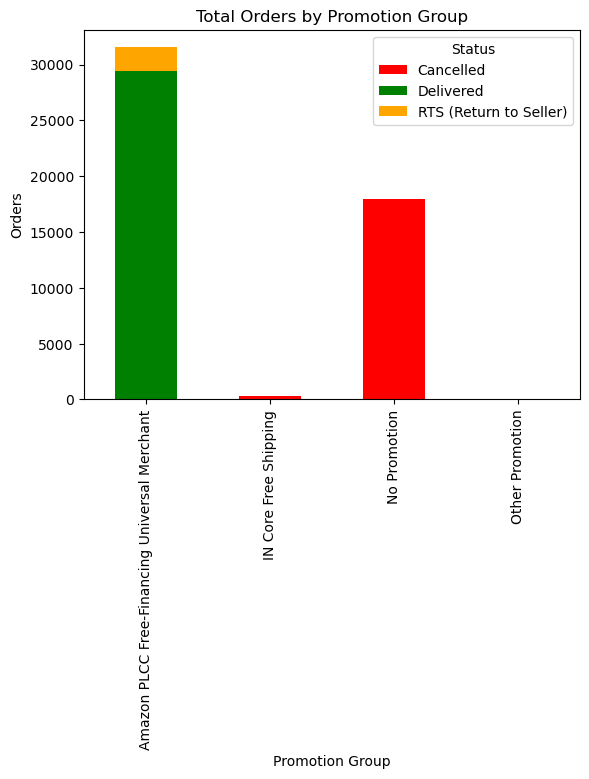

In [49]:
# visualize orders with and without promotions
promo_status_cnts.plot(kind='bar', stacked='True', title='Total Orders by Promotion Group', 
                       ylabel='Orders', xlabel='Promotion Group',
                       color={'Delivered': 'green', 'Cancelled': 'red', 'RTS (Return to Seller)': 'orange'})

# show plot
plt.show()

In [50]:
# perform chi-square test

# define contingency table (observed values)
contingency_table = promo_status_cnts

# run chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# print results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)
print("--------------------------------------------------------")
print("--------------------------------------------------------")

# convert observed and expected values to dataframes for comparison
observed_df = contingency_table
expected_df = pd.DataFrame(expected, index=observed_df.index, columns=observed_df.columns)

# calculate order difference and percentage difference
order_diff = observed_df - expected_df
percentage_diff = ((observed_df - expected_df) / expected_df) * 100

# print difference tables
print("Order Count: Observed - Expected".upper())
print(order_diff)
print("--------------------------------------------------------")
print("% Difference between Observed & Expected Orders".upper())
print(percentage_diff)

Chi-Square Statistic: 49621.88729838506
P-value: 0.0
Degrees of Freedom: 6
Expected Frequencies Table:
[[1.15446885e+04 1.86537862e+04 1.32852529e+03]
 [1.06925779e+02 1.72769549e+02 1.23046717e+01]
 [6.58801951e+03 1.06448526e+04 7.58127903e+02]
 [3.66184176e-01 5.91676537e-01 4.21392865e-02]]
--------------------------------------------------------
--------------------------------------------------------
ORDER COUNT: OBSERVED - EXPECTED
Status                                            Cancelled     Delivered  \
promotion-group                                                             
Amazon PLCC Free-Financing Universal Merchant -11544.688523  10778.213808   
IN Core Free Shipping                            185.074221   -172.769549   
No Promotion                                   11358.980486 -10604.852583   
Other Promotion                                    0.633816     -0.591677   

Status                                         RTS (Return to Seller)  
promotion-group       

In [51]:
# calculate success, cancelled, and rts rates
promo_status_cnts['Total Orders'] = promo_status_cnts.sum(axis=1)
promo_status_cnts['Success Rate (%)'] = (promo_status_cnts['Delivered'] / promo_status_cnts['Total Orders']) * 100
promo_status_cnts['Cancelled Rate (%)'] = (promo_status_cnts['Cancelled'] / promo_status_cnts['Total Orders']) * 100
promo_status_cnts['Returned Rate (%)'] = (promo_status_cnts['RTS (Return to Seller)'] / promo_status_cnts['Total Orders']) * 100

# display promo status cnts
promo_status_cnts

Status,Cancelled,Delivered,RTS (Return to Seller),Total Orders,Success Rate (%),Cancelled Rate (%),Returned Rate (%)
promotion-group,,,,,,,
Amazon PLCC Free-Financing Universal Merchant,0,29432,2095,31527,93.354902,0.000000,6.645098
IN Core Free Shipping,292,0,0,292,0.000000,100.000000,0.000000
No Promotion,17947,40,4,17991,0.222333,99.755433,0.022233
Other Promotion,1,0,0,1,0.000000,100.000000,0.000000


In [52]:
# look at success rates
promo_status_cnts[['Total Orders', 'Success Rate (%)', 'Cancelled Rate (%)', 'Returned Rate (%)']]

Status,Total Orders,Success Rate (%),Cancelled Rate (%),Returned Rate (%)
promotion-group,,,,
Amazon PLCC Free-Financing Universal Merchant,31527,93.354902,0.000000,6.645098
IN Core Free Shipping,292,0.000000,100.000000,0.000000
No Promotion,17991,0.222333,99.755433,0.022233
Other Promotion,1,0.000000,100.000000,0.000000


### **Analysis:** Are the proportions of order statuses dependent on the promotion group? --> Does the order status vary depending on the promotion group? YES
- Chi Square Statistic: large value (49621.89) indicating stronger evidence that order status varies depending on the promotion group.
- P-value < 0.05: further indicates that there is a statistically significant relationship between order status and promotion group.

Stats
- looking further into the stats show that *Amazon PLCC Free Financing Universal Merchant* has the highest success rate (93.35%) and 0 cancellations. It also has the highest amount of orders.
- the worst promotion groups are IN Core Free Shipping and the other promotion which lead to 100% cancellations.
- Not having a promotion has also led to undesired results with a 99.76% cancellation rate.

## Analyze orders by promotion and month

In [53]:
# group data by month and promotion
monthly_promo_stats = product_sales_df.groupby(['Month', 'promotion-group', 'Status'])['Order ID'].count().unstack(fill_value=0)
monthly_promo_stats['Total Orders'] = monthly_promo_stats.sum(axis=1)

# display df
monthly_promo_stats

Status                                                 Cancelled  Delivered  \
Month   promotion-group                                                       
2022-04 Amazon PLCC Free-Financing Universal Merchant          0      11948   
        IN Core Free Shipping                                125          0   
        No Promotion                                        6987         13   
2022-05 Amazon PLCC Free-Financing Universal Merchant          0      10312   
        IN Core Free Shipping                                 90          0   
        No Promotion                                        5752         15   
        Other Promotion                                        1          0   
2022-06 Amazon PLCC Free-Financing Universal Merchant          0       7172   
        IN Core Free Shipping                                 77          0   
        No Promotion                                        5208         12   

Status                                                 RTS (Return to Seller)  \
Month   promotion-group                                                         
2022-04 Amazon PLCC Free-Financing Universal Merchant                     898   
        IN Core Free Shipping                                               0   
        No Promotion                                                        0   
2022-05 Amazon PLCC Free-Financing Universal Merchant                     711   
        IN Core Free Shipping                                               0   
        No Promotion                                                        4   
        Other Promotion                                                     0   
2022-06 Amazon PLCC Free-Financing Universal Merchant                     486   
        IN Core Free Shipping                                               0   
        No Promotion                                                        0   

Status                                                 Total Orders  
Month   promotion-group                                              
2022-04 Amazon PLCC Free-Financing Universal Merchant         12846  
        IN Core Free Shipping                                   125  
        No Promotion                                           7000  
2022-05 Amazon PLCC Free-Financing Universal Merchant         11023  
        IN Core Free Shipping                                    90  
        No Promotion                                           5771  
        Other Promotion                                           1  
2022-06 Amazon PLCC Free-Financing Universal Merchant          7658  
        IN Core Free Shipping                                    77  
        No Promotion                                           5220

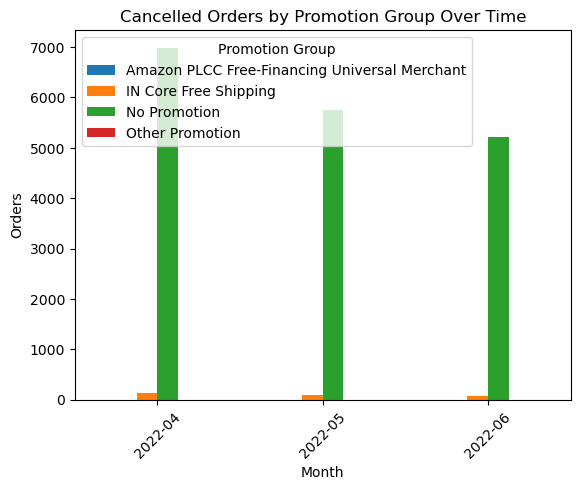

In [55]:
# show cancelled trends over time
monthly_promo_stats['Cancelled'].unstack('promotion-group').plot(kind='bar', title='Cancelled Orders by Promotion Group Over Time', 
                                                                 ylabel='Orders', rot=45)

plt.legend(title='Promotion Group')

# show plot
plt.show()

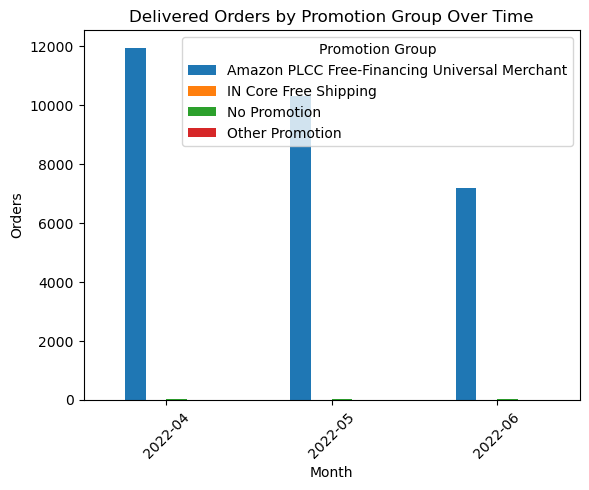

In [56]:
# show delivered trends over time
monthly_promo_stats['Delivered'].unstack('promotion-group').plot(kind='bar', title='Delivered Orders by Promotion Group Over Time', 
                                                                 ylabel='Orders', rot=45)

plt.legend(title='Promotion Group')

# show plot
plt.show()

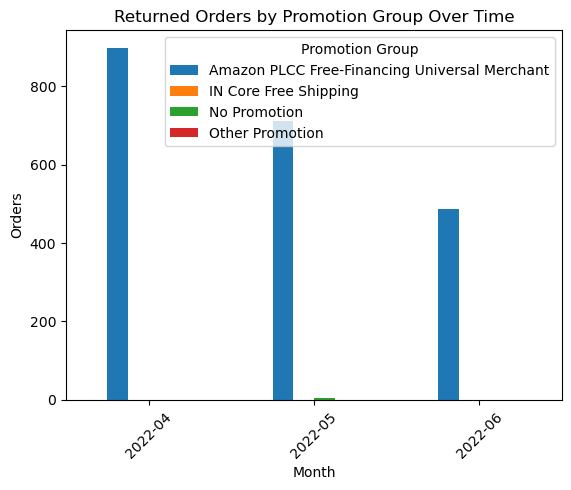

In [57]:
# show returned trends over time
monthly_promo_stats['RTS (Return to Seller)'].unstack('promotion-group').plot(kind='bar', title='Returned Orders by Promotion Group Over Time', 
                                                                              ylabel='Orders', rot=45)

plt.legend(title='Promotion Group')

# show plot
plt.show()

#### See each promotion group's percentage contribution to total monthly orders

In [ ]:
# calculate each promotion group's percentage contribution to total monthly orders

# calculate total orders for each month
monthly_totals = monthly_promo_stats.groupby('Month')['Total Orders'].sum()

# add a percentage column for each promo group
monthly_promo_stats['Percentage'] = (
    monthly_promo_stats['Total Orders'] / monthly_promo_stats.index.get_level_values('Month').map(monthly_totals)) * 100

In [63]:
# display updated monthly promo stats
monthly_promo_stats

Status                                                 Cancelled  Delivered  \
Month   promotion-group                                                       
2022-04 Amazon PLCC Free-Financing Universal Merchant          0      11948   
        IN Core Free Shipping                                125          0   
        No Promotion                                        6987         13   
2022-05 Amazon PLCC Free-Financing Universal Merchant          0      10312   
        IN Core Free Shipping                                 90          0   
        No Promotion                                        5752         15   
        Other Promotion                                        1          0   
2022-06 Amazon PLCC Free-Financing Universal Merchant          0       7172   
        IN Core Free Shipping                                 77          0   
        No Promotion                                        5208         12   

Status                                                 RTS (Return to Seller)  \
Month   promotion-group                                                         
2022-04 Amazon PLCC Free-Financing Universal Merchant                     898   
        IN Core Free Shipping                                               0   
        No Promotion                                                        0   
2022-05 Amazon PLCC Free-Financing Universal Merchant                     711   
        IN Core Free Shipping                                               0   
        No Promotion                                                        4   
        Other Promotion                                                     0   
2022-06 Amazon PLCC Free-Financing Universal Merchant                     486   
        IN Core Free Shipping                                               0   
        No Promotion                                                        0   

Status                                                 Total Orders  \
Month   promotion-group                                               
2022-04 Amazon PLCC Free-Financing Universal Merchant         12846   
        IN Core Free Shipping                                   125   
        No Promotion                                           7000   
2022-05 Amazon PLCC Free-Financing Universal Merchant         11023   
        IN Core Free Shipping                                    90   
        No Promotion                                           5771   
        Other Promotion                                           1   
2022-06 Amazon PLCC Free-Financing Universal Merchant          7658   
        IN Core Free Shipping                                    77   
        No Promotion                                           5220   

Status                                                 Percentage  
Month   promotion-group                                            
2022-04 Amazon PLCC Free-Financing Universal Merchant   64.323269  
        IN Core Free Shipping                            0.625908  
        No Promotion                                    35.050824  
2022-05 Amazon PLCC Free-Financing Universal Merchant   65.282795  
        IN Core Free Shipping                            0.533017  
        No Promotion                                    34.178265  
        Other Promotion                                  0.005922  
2022-06 Amazon PLCC Free-Financing Universal Merchant   59.112312  
        IN Core Free Shipping                            0.594365  
        No Promotion                                    40.293323

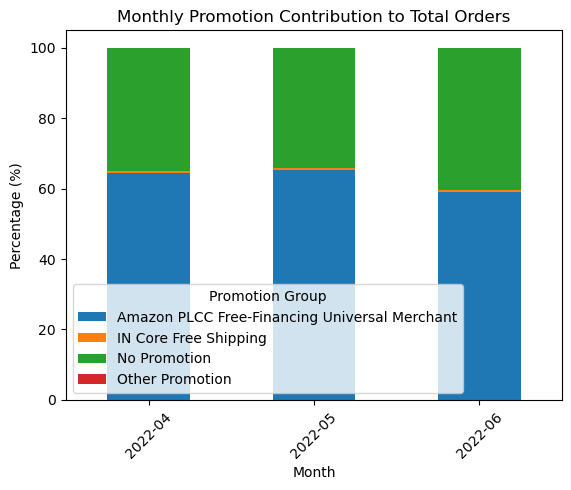

In [ ]:
# plot percentage contributions
monthly_promo_stats['Percentage'].unstack('promotion-group').plot(kind='bar', stacked=True, rot=45)

# customize plot
plt.title('Monthly Promotion Contribution to Total Orders')
plt.ylabel('Percentage (%)')
plt.xlabel('Month')
plt.legend(title='Promotion Group')

# show plot
plt.show()

In [71]:
# perform chi-square test

# define contingency table (observed values)
contingency_table = monthly_promo_stats['Total Orders'].unstack('promotion-group').fillna(0)

# run chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# print results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)
print("--------------------------------------------------------")
print("--------------------------------------------------------")

# convert observed and expected values to dataframes for comparison
observed_df = contingency_table
expected_df = pd.DataFrame(expected, index=observed_df.index, columns=observed_df.columns)

# calculate order difference and percentage difference
order_diff = observed_df - expected_df
percentage_diff = ((observed_df - expected_df) / expected_df) * 100

# print difference tables
print("Order Count: Observed - Expected".upper())
print(order_diff)
print("--------------------------------------------------------")
print("% Difference between Observed & Expected Orders".upper())
print(percentage_diff)

Chi-Square Statistic: 139.41938072506156
P-value: 1.3288650161598955e-27
Degrees of Freedom: 6
Expected Frequencies Table:
[[1.26402947e+04 1.17073177e+02 7.21323123e+03 4.00935536e-01]
 [1.06870650e+04 9.89825541e+01 6.09861346e+03 3.38981350e-01]
 [8.19964034e+03 7.59442693e+01 4.67915531e+03 2.60083114e-01]]
--------------------------------------------------------
--------------------------------------------------------
ORDER COUNT: OBSERVED - EXPECTED
promotion-group  Amazon PLCC Free-Financing Universal Merchant  \
Month                                                            
2022-04                                             205.705346   
2022-05                                             335.934994   
2022-06                                            -541.640340   

promotion-group  IN Core Free Shipping  No Promotion  Other Promotion  
Month                                                                  
2022-04                       7.926823   -213.231234        -0.40

### Analysis: Does the proportions of promotion groups significantly vary accross months? YES
- P-value < 0.05: very small p-value indicates that the distribution of promotion groups vary significantly across months.
- Chi-Squared Statistic (139.42): relatively large value indicates further support that proprotions of promotion groups vary across months.

Stats
- We can see that Amazon PLCC Free-Financing Universal Merchant orders were proportionately higher in April and highest in May, meanwhile they were the lowest in June.
- Also, no promotion orders were proportionately lower in April and lowest in May, meanwhile they were the highest in June.
- Further connecting this to previous data shows that the largest contributor to successfully delivered orders are Amazon PLCC Free-Financing Universal Merchant orders, meanwhile no promotion orders are the largest contributor to cancelled orders.
- Overall, this implies that monthly order success relates to promotion contribution:
    - the higher percentage of success rates and lower percentage of cancellation rates observed in May could be because of the higher proportion of Amazon PLCC Free-Financing Universal Merchant orders and lower amount of no promotion orders.
    - for the worst month in terms of lower success rates and higher cancellation rates, June, shows a low amount of Amazon PLCC Free-Financing Universal Merchant orders and higher amount of no promotion orders.